In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
filename = 'times.txt'
df = pd.read_csv(filename)


In [14]:
df[["totaltime", "seconds"]] = df["totaltime"].str.split(":", 1, expand=True)
df[["seconds", "mSeconds"]] = df["seconds"].str.split(".", 1, expand=True)
df["totaltime"] = df["totaltime"].astype(int) * 60 + df["seconds"].astype(int)

In [15]:
df["program"] = df["program"].str.strip("  ")

In [16]:
df[["program", "n"]] = df["program"].str.split(" ", 1, expand=True)
df[["n", "cores"]] = df["n"].str.split(" ", 1, expand=True)
df[["cores", "name"]] = df["cores"].str.split(" ", 1, expand=True)
df[["name", "timeSteps"]] = df["name"].str.split(" ", 1, expand=True)
df[["timeSteps", "xSize"]] = df["timeSteps"].str.split(" ", 1, expand=True)
df[["xSize", "ySize"]] = df["xSize"].str.split(" ", 1, expand=True)

In [17]:

df['amountCores'] = df['cores'].astype(int)
df['program'] = df['name'] + df['timeSteps'] + df['amountCores'].astype(str)
df['timeSteps'] = df["timeSteps"].astype(int)
df['cpu'] = df['cpu'].str.strip("%").astype(int) / df['amountCores'].astype(int)

In [18]:
df2 = df.groupby('program').mean()

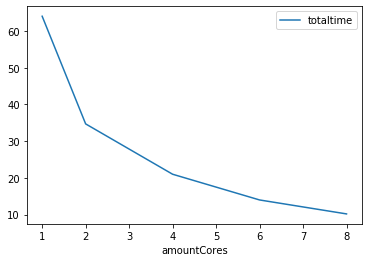

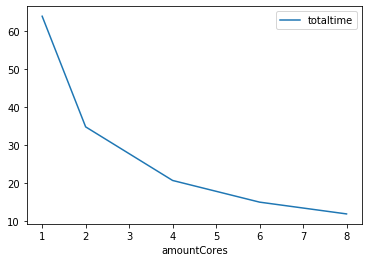

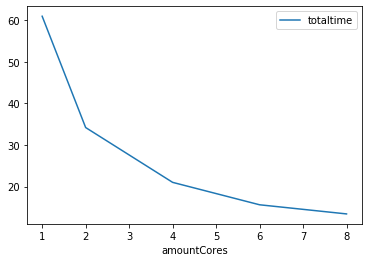

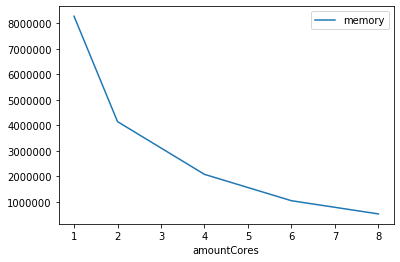

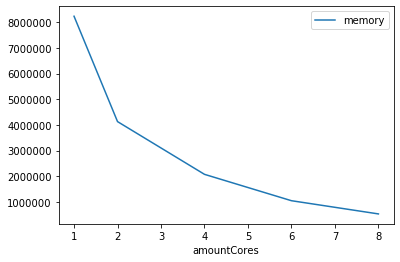

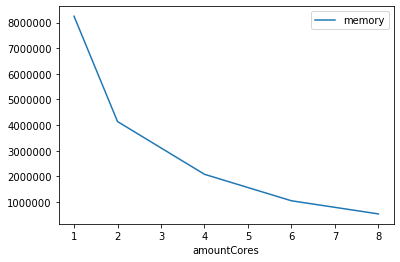

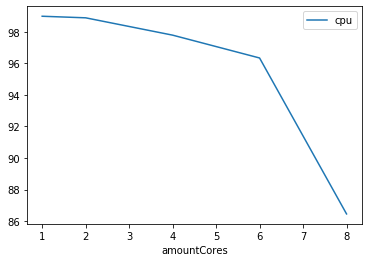

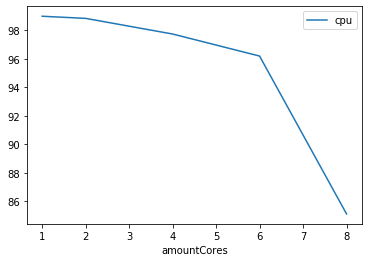

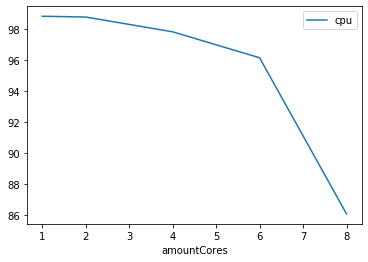

In [19]:
df2.groupby("timeSteps").plot(x="amountCores", y="totaltime")
df2.groupby("timeSteps").plot(x="amountCores", y="memory")
df2.groupby("timeSteps").plot(x="amountCores", y="cpu")
plt.show()